Decision Tree RMSE: 3.394881948026872
Random Forest RMSE: 3.3948914306934177


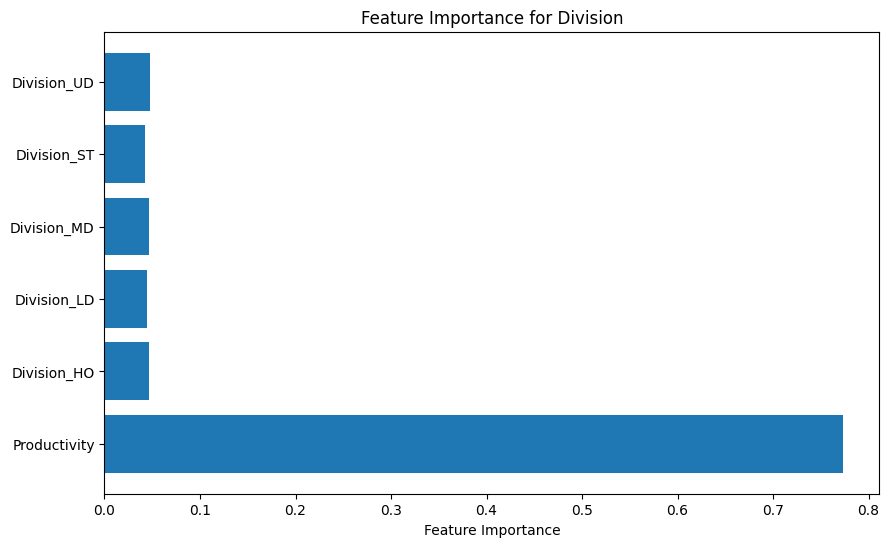

In [4]:
# Load the data and preprocess it
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Sample.csv")

# Data preprocessing
# Calculate Productivity
df['Productivity'] = df['ExtraKilos'] / df['Area (Ha)']

# Convert DateofWork to datetime and extract month
df['DateofWork'] = pd.to_datetime(df['DateofWork'])
df['Month'] = df['DateofWork'].dt.month

# One-hot encode Division
df = pd.get_dummies(df, columns=['Division'])

# Initialize variables for evaluation
division_columns = [col for col in df.columns if col.startswith('Division_')]
X = df[['Productivity'] + division_columns]
y = df['Month']

# Initialize lists to store evaluation results
decision_tree_rmse = []
random_forest_rmse = []

# Number of Bootstrapped samples
n_samples = 100

# Perform Bootstrapping and model evaluation
for _ in range(n_samples):
    # Create Bootstrapped samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=np.random.randint(100))

    # Decision Tree
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    decision_tree_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_dt)))

    # Random Forest (you can use other ML approaches)
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    random_forest_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Evaluate and compare models
print("Decision Tree RMSE:", np.mean(decision_tree_rmse))
print("Random Forest RMSE:", np.mean(random_forest_rmse))

# Visualize feature importance (for example, Division)
importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, tick_label=X.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Division')
plt.show()

# Summarize knowledge gained
# Discuss insights and model comparisons based on the results


Decision Tree RMSE: 3.394881948026872
Random Forest RMSE: 3.3948914306934177


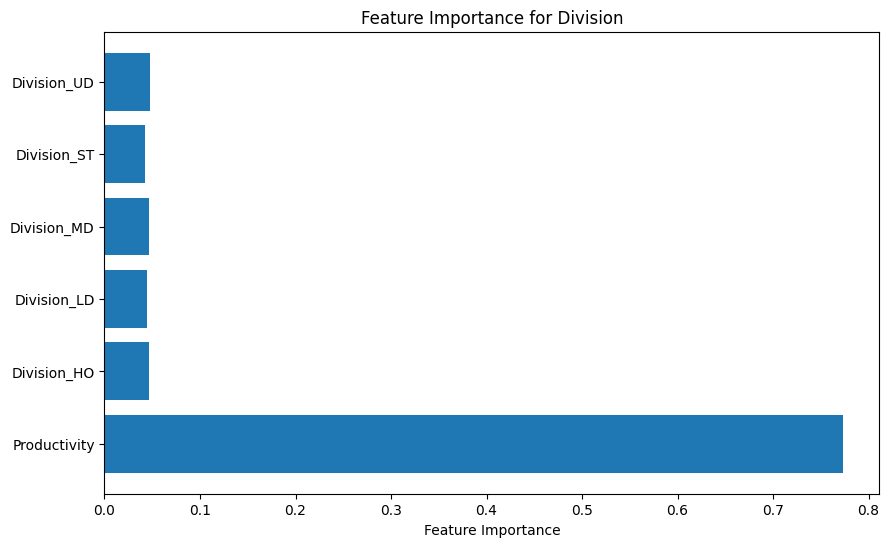

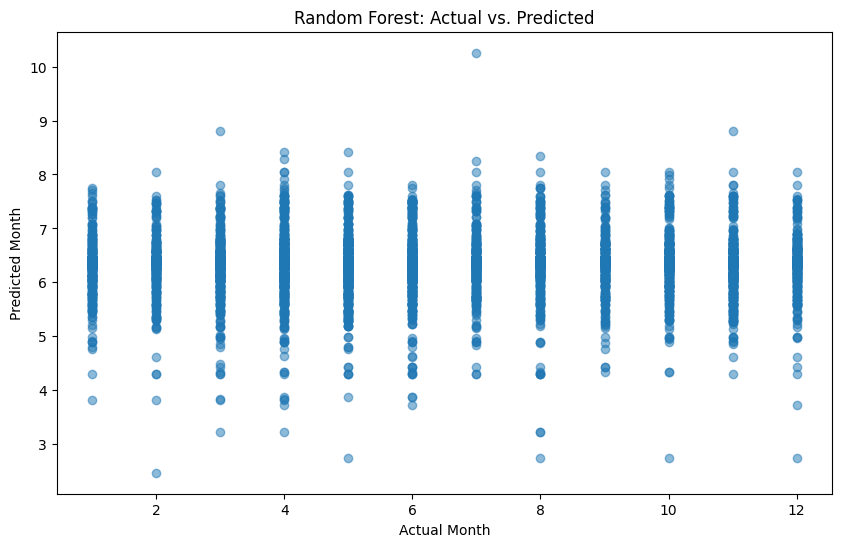

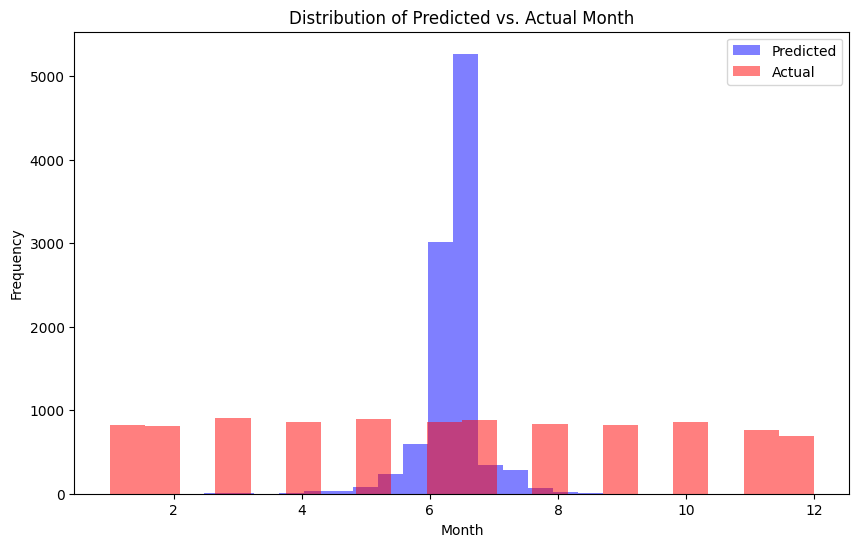

In [5]:
# Evaluate and compare models
print("Decision Tree RMSE:", np.mean(decision_tree_rmse))
print("Random Forest RMSE:", np.mean(random_forest_rmse))

# Visualize feature importance (for example, Division)
importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, tick_label=X.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Division')
plt.show()

# Visualize model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Month')
plt.ylabel('Predicted Month')
plt.title('Random Forest: Actual vs. Predicted')
plt.show()

# Additional visualization: Distribution of predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_pred_rf, bins=20, alpha=0.5, color='blue', label='Predicted')
plt.hist(y_test, bins=20, alpha=0.5, color='red', label='Actual')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs. Actual Month')
plt.legend()
plt.show()

# You can also add hyperparameter tuning for the models if needed

# Summarize knowledge gained
# Discuss insights, model comparisons, and any further steps for improvement
